In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = []
for i in range(2010,2020):
    fname = str(i)
    temp = pd.read_csv("~/work/Data/yearly_data/"+fname+".csv")
    if 'customerId' in temp:
        temp.drop('customerId',axis=1)
    if 'customerType' in temp:
        temp.drop('customerType',axis=1)
    if 'dob' in temp:
        temp.drop('dob',axis=1)
    if 'customerInfo' in temp:
        temp.drop('customerInfo',axis=1)
    
    df.append(temp)

In [4]:
df[1]

,id,date,saturation,storeId,customerId,customerType,dob,customerInfo,productId,color,quantity
0,217176,2011-01-31 21:10:57,1,3930,76614,1,NaN,NaN,000002656,22,1
1,217176,2011-01-31 21:10:57,1,3930,76614,1,NaN,NaN,000002656,84,1
2,217176,2011-01-31 21:10:57,1,3930,76614,1,NaN,NaN,000085542,12,1
3,218987,2011-01-31 18:12:41,1,3930,76587,2,NaN,NaN,000004800,18,1
4,218987,2011-01-31 18:12:41,1,3930,76587,2,NaN,NaN,000010631,12,1
...,...,...,...,...,...,...,...,...,...,...,...
207922,2001741,2011-09-24 11:13:21,1,3930,99384,2,NaN,NaN,000012707,42,1
207923,2001741,2011-09-24 11:13:21,1,3930,99384,2,NaN,NaN,000012707,87,1
207924,2001747,2011-09-24 21:48:44,1,3930,99435,2,NaN,NaN,011130054,56,1
207925,2001747,2011-09-24 21:48:44,1,3930,99435,2,NaN,NaN,011140030,24,1


<h2>Total demand by Year</h2>

In [5]:
#Total demand by Year
total_demand = []
for i in df:
    #print(i)
    total_demand.append(i['quantity'].sum())
print(total_demand)

[145312, 253645, 255914, 297081, 353782, 424474, 1112730, 1115834, 1117196, 1112403]


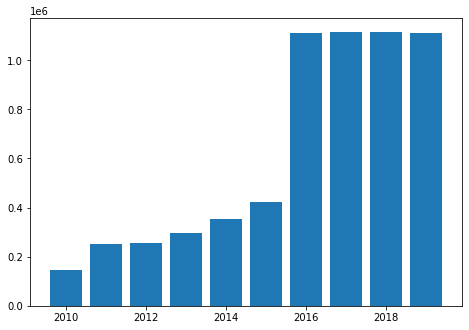

In [6]:
fig = plt.figure()
ax = fig.add_axes([1000,500,1,1])
years = []
for i in range(2010,2020):
    years.append(i)

ax.bar(years,total_demand)
plt.show()

<h2>Total Stores by Year</h2>

In [7]:
#Total demand by Year
num_store = []
for i in df:
    #print(i)
    num_store.append(len(i['storeId'].unique()))
print(num_store)

[1, 2, 2, 2, 7, 125, 277, 273, 263, 256]


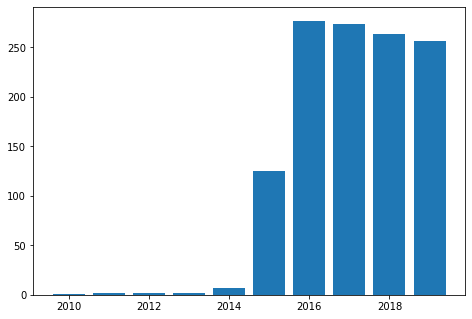

In [8]:
fig = plt.figure()
ax = fig.add_axes([1000,500,1,1])

ax.bar(years,num_store)
plt.show()

<h2>Demand per Store by Year<h2>

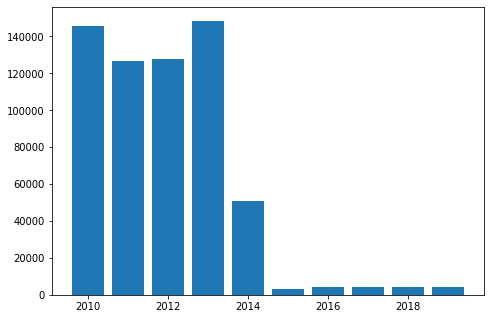

In [9]:
fig = plt.figure()
ax = fig.add_axes([1000,500,1,1])

demand_per_store = []
for i in range(len(df)):
    
    temp = total_demand[i]/num_store[i]
    demand_per_store.append(temp)
    
ax.bar(years,demand_per_store)
plt.show()



<h2>Demand per Stores by Month of Year</h2>

In [30]:
#add month column
for i in df:
    i['date'] = pd.to_datetime(i['date'])
   
    i['month'] = pd.DatetimeIndex(i['date']).month

In [34]:
#calculate monthly demand for each year
month_summary = []
for i in df:
    #print(i['year'])
    temp = i.groupby("month")
    t1 = temp['quantity'].sum()
    
    month_summary.append(t1)
  

In [59]:
#calculate monthly average demand for 10 years
total_demand_by_month = [0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(len(df)):
    for j in month_summary[i].index:
        total_demand_by_month[j-1] += month_summary[i][j]

for i in range(len(total_demand_by_month)):
    total_demand_by_month[i] = total_demand_by_month[i]/len(years)

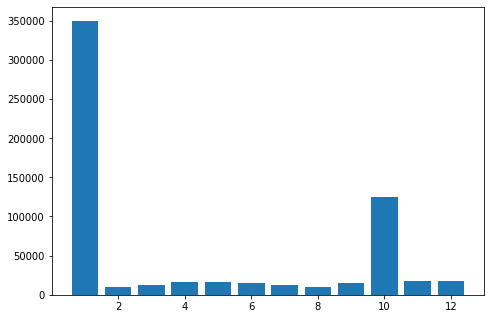

In [64]:
fig = plt.figure()
ax = fig.add_axes([1000,500,1,1])

demand_per_store = []
for i in range(len(df)):
    
    temp = total_demand_by_month[i]/num_store[i]
    demand_per_store.append(temp)
    
ax.bar(month_summary[0].index,total_demand_by_month)
plt.show()
